##### Import matplotlib, numpy, and pandas and execute the matplotlib magic command:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Analysis of Private Construction Data

##### Read data from file : ConstructionTimeSeriesDatav2.csv:

In [2]:
dfCC = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
dfCC.head() # view top 5 rows in df

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


##### Check df column names:

In [3]:
dfCC.columns

Index(['Month', 'Month-Year', 'Total Construction', 'Private Construction',
       'Public Construction'],
      dtype='object')

##### Plot to assess data:

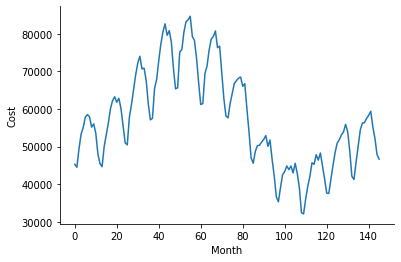

In [4]:
fig,ax = plt.subplots()
ax.plot(dfCC['Private Construction'],label='Private Costs')
ax.set_xlabel('Month')
ax.set_ylabel('Cost')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

##### The private construction data appears non-linear.

##### Compute moving average:

C:\Users\deong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  if __name__ == '__main__':
C:\Users\deong\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Average Squared Error per Month:  35422292.491632506
            Month Month-Year  Total Construction  Private Construction  \
2003-01-31     13     Jan-03               59877                 45473   
2003-02-28     14     Feb-03               58526                 44620   
2003-03-31     15     Mar-03               64506                 49996   
2003-04-30     16     Apr-03               69638                 53195   
2003-05-31     17     May-03               74473                 56286   
...           ...        ...                 ...                   ...   
2012-10-31    130     Oct-12               81520                 55888   
2012-11-30    131     Nov-12               77091                 53942   
2012-12-31    132     Dec-12               68136                 48740   
2013-01-31    133     Jan-13               59143                 42070   
2013-02-28    134     Feb-13               58395                 41224   

            Public Construction        MovAvg         sqEr

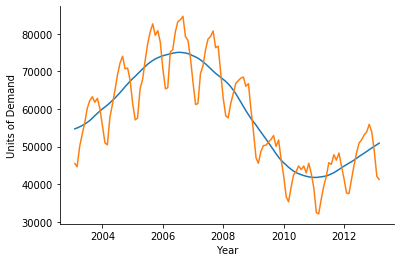

In [5]:
##### #custom function to calculate
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2

dfCC['MovAvg'] = np.NaN
dfCC['sqErr'] = np.NaN

# Chaging the DataFrame index to DatetimeIndex data type
dfCC.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(dfCC['Private Construction']))

window =24
window = window - window % 2

# Compute the moving average using a window centered on the data point whose average is being computed
for i in range(int(window/2),dfCC.shape[0]-int(window/2)):
    dfCC.loc[dfCC.index[i],'MovAvg'] = (0.5*dfCC.iloc[i - int(window/2)]['Private Construction'] + dfCC.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfCC.iloc[i + int(window/2)]['Private Construction'])/float(window)

dfCC['sqErr'] = (dfCC['Private Construction'] - dfCC['MovAvg'])**2

# Delete rows where moving average could not be calculated 
dfCC.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfCC['MovAvg'],label='Moving Avg.')
ax.plot(dfCC['Private Construction'],label='Private Construction Cost')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfCC['sqErr'])/len(dfCC))
print(dfCC)



##### Computing R1 by subtracting the moving average from the construction cost time series. Also, 
##### Computing 𝑅1 as a percentage of cost (𝑅1𝐸𝑟𝑟𝑜𝑟).

In [6]:
dfCC['R1'] = dfCC['Private Construction'] - dfCC['MovAvg']
dfCC['R1Error'] = abs((dfCC['Private Construction'] - dfCC['R1'])/dfCC['Private Construction'])
dfCC.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error
2003-01-31 00:00:00,13,Jan-03,59877,45473,14404,54694.4,"85,033,756.9","-9,221.4",1.203
2003-02-28 00:00:00,14,Feb-03,58526,44620,13906,54937.6,"106,453,385.6","-10,317.6",1.231
2003-03-31 00:00:00,15,Mar-03,64506,49996,14510,55237.1,"27,468,954.5","-5,241.1",1.105
2003-04-30 00:00:00,16,Apr-03,69638,53195,16444,55576.5,"5,671,740.7","-2,381.5",1.045
2003-05-31 00:00:00,17,May-03,74473,56286,18187,55949.7,"113,092.1",336.3,0.994
2003-06-30 00:00:00,18,Jun-03,80377,60076,20301,56392.5,"13,567,865.3","3,683.5",0.939
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,56911.6,"28,136,836.2","5,304.4",0.915
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,57530.8,"32,526,110.0","5,703.2",0.910
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,58188.2,"12,807,898.9","3,578.8",0.942
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,58820.2,"15,942,218.9","3,992.8",0.936


##### Display 𝑅1 and calculate the average residual demand pattern.

Average Residual:  -128.45833333333326


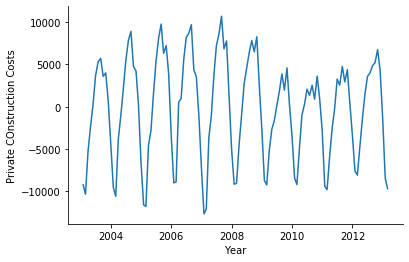

In [7]:
fig,ax = plt.subplots()
ax.plot(dfCC['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Private COnstruction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfCC['R1'])/len(dfCC))

##### Use autocorrelation analysis to detect whether any cyclical patterns exist and how many periods before they are repeated.

In [8]:
maxCorr = 0.0
period = np.NaN
for i in range(1,25):
    corr = dfCC['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8120751333935452
Correlation, lag  2     0.4282692331526067
Correlation, lag  3     -0.02646646398974738
Correlation, lag  4     -0.40983995789979843
Correlation, lag  5     -0.6762655818700407
Correlation, lag  6     -0.8028731553529684
Correlation, lag  7     -0.7018407312644882
Correlation, lag  8     -0.455034007967167
Correlation, lag  9     -0.0816734668578855
Correlation, lag  10     0.36532271423582574
Correlation, lag  11     0.7409089597661687
Correlation, lag  12     0.9315626329218275
Correlation, lag  13     0.7658004796059998
Correlation, lag  14     0.4102417419615045
Correlation, lag  15     -0.02768745747839125
Correlation, lag  16     -0.402710829173791
Correlation, lag  17     -0.6610845035612412
Correlation, lag  18     -0.7864232287415243
Correlation, lag  19     -0.6871128546637586
Correlation, lag  20     -0.453009101761986
Correlation, lag  21     -0.09054074006874907
Correlation, lag  22     0.34563591085831186
Correlation, lag  23    

##### Maximum correlation occurs at period of 12



##### Break the time series into 10 components corresonding with each of the three cycles in the data. 
##### Computes an average for each of the 24 points within the cycle over all intances of each point in the data. 
##### Plots the average versus the 10 cycles within the data

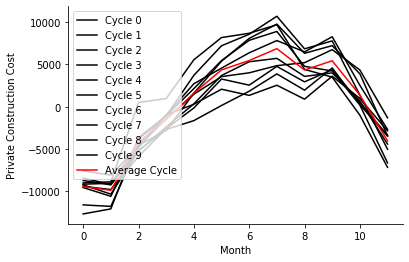

In [9]:
cycleLen = period
numCycles = int(len(dfCC)/cycleLen + 0.5)
cycles = [dfCC.iloc[range(i*period,min((i+1)*period,len(dfCC)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfCC.iloc[range(i,len(dfCC['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Private Construction Cost')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

##### Create column 'C' and insert Cyclicality value.
##### Plot the cyclicality component  '𝐶'  with  𝑅1  column to compare

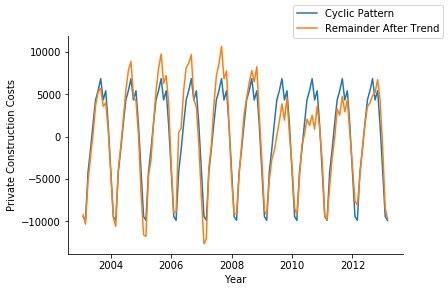

In [10]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfCC)/cycleLen + 0.5)
dfCC['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(dfCC)):
    dfCC.loc[dfCC.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(dfCC['C'],label='Cyclic Pattern')
ax.plot(dfCC['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

##### Compute the 𝜖(𝑚) in the model. THis is the "noise" in the original graph not accounted for in the Trend or Cyclical terms.
##### Compute error (R2).
##### Plots Trend plus Cyclical model with original data.
##### Computes absolute error.
##### Removes the sqErr.


Average Error:  0.026277911797269758
            Month Month-Year  Total Construction  Private Construction  \
2003-01-31     13     Jan-03               59877                 45473   
2003-02-28     14     Feb-03               58526                 44620   
2003-03-31     15     Mar-03               64506                 49996   
2003-04-30     16     Apr-03               69638                 53195   
2003-05-31     17     May-03               74473                 56286   
...           ...        ...                 ...                   ...   
2012-10-31    130     Oct-12               81520                 55888   
2012-11-30    131     Nov-12               77091                 53942   
2012-12-31    132     Dec-12               68136                 48740   
2013-01-31    133     Jan-13               59143                 42070   
2013-02-28    134     Feb-13               58395                 41224   

            Public Construction        MovAvg            R1   R1Error  \
2

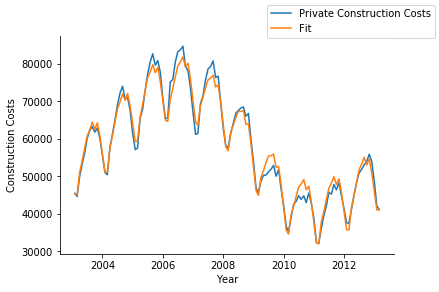

In [11]:
dfCC['R2'] = dfCC['R1'] - dfCC['C']
dfCC['R2Error'] = abs(dfCC['R2']/dfCC['Private Construction'])
dfCC['fit'] = dfCC['MovAvg'] + dfCC['C']
dfCC.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(dfCC['R2Error'])/len(dfCC))
print(dfCC)
fig,ax = plt.subplots()
ax.plot(dfCC['Private Construction'],label='Private Construction Costs')
ax.plot(dfCC['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

##### Plot R2 to observe any remaining patterns that need to be captured.
Generate autocorrelation of the residual.

Correlation, lag  1     0.8118770643646452
Correlation, lag  2     0.6023661854292592
Correlation, lag  3     0.3374524162346559
Correlation, lag  4     0.10839923052440813
Correlation, lag  5     -0.11086884805020765
Correlation, lag  6     -0.22549984180187163
Correlation, lag  7     -0.24375040342377727
Correlation, lag  8     -0.16128013153570026
Correlation, lag  9     -0.06260340593634778
Correlation, lag  10     0.08632836344153025
Correlation, lag  11     0.21659972144964623
Correlation, lag  12     0.3455441548529702
Correlation, lag  13     0.31012715544913266
Correlation, lag  14     0.27644700864092864
Correlation, lag  15     0.14970490626809996
Correlation, lag  16     0.04999737705161155
Correlation, lag  17     -0.051379652937804936
Correlation, lag  18     -0.08853627244333424
Correlation, lag  19     -0.07894126126140188
Correlation, lag  20     -0.044905101032702836
Correlation, lag  21     -0.006330414691297124
Correlation, lag  22     0.05352185523980167
Correlatio

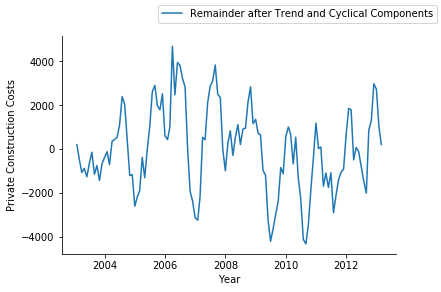

In [12]:
fig,ax = plt.subplots()
ax.plot(dfCC['R2'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Private Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfCC['R2'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

##### Plot the model versus the original data and 𝑅2 to judge the fit.

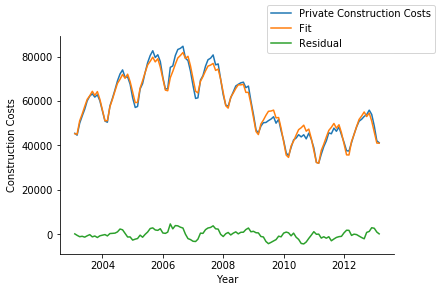

In [13]:
fig,ax = plt.subplots()
ax.plot(dfCC['Private Construction'],label='Private Construction Costs')
ax.plot(dfCC['fit'],label='Fit')
ax.plot(dfCC['R2'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

# Analysis of Public Construction Data

In [14]:
dfPP = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
dfPP.head() # view top 5 rows in df

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375


In [15]:
dfPP.columns

Index(['Month', 'Month-Year', 'Total Construction', 'Private Construction',
       'Public Construction'],
      dtype='object')

##### Plot to assess data:

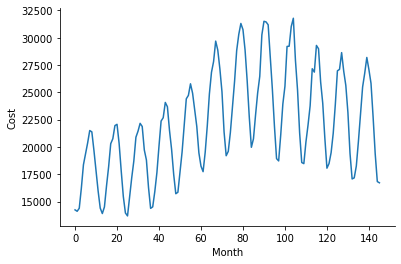

In [16]:
fig,ax = plt.subplots()
ax.plot(dfPP['Public Construction'],label='Public Costs')
ax.set_xlabel('Month')
ax.set_ylabel('Cost')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

##### Data only appears to be partially linear. 

##### Compute moving average:

C:\Users\deong\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  if __name__ == '__main__':


Average Squared Error per Month:  13456340.23072845
            Month Month-Year  Total Construction  Private Construction  \
2003-01-31     13     Jan-03               59877                 45473   
2003-02-28     14     Feb-03               58526                 44620   
2003-03-31     15     Mar-03               64506                 49996   
2003-04-30     16     Apr-03               69638                 53195   
2003-05-31     17     May-03               74473                 56286   
...           ...        ...                 ...                   ...   
2012-10-31    130     Oct-12               81520                 55888   
2012-11-30    131     Nov-12               77091                 53942   
2012-12-31    132     Dec-12               68136                 48740   
2013-01-31    133     Jan-13               59143                 42070   
2013-02-28    134     Feb-13               58395                 41224   

            Public Construction        MovAvg         sqErr

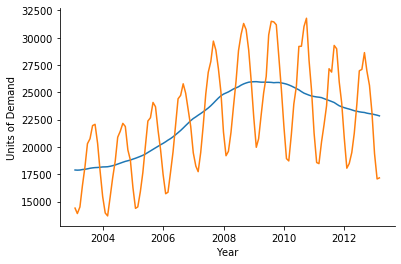

In [17]:
#custom function to calculate sqErr
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2

dfPP['MovAvg'] = np.NaN
dfPP['sqErr'] = np.NaN

# Chaging the DataFrame index to DatetimeIndex data type
dfPP.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=31), periods = len(dfPP['Public Construction']))

window =24
window = window - window % 2

# Compute the moving average using a window centered on the data point whose average is being computed
for i in range(int(window/2),dfPP.shape[0]-int(window/2)):
    dfPP.loc[dfPP.index[i],'MovAvg'] = (0.5*dfPP.iloc[i - int(window/2)]['Public Construction'] + dfPP.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfPP.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfPP['sqErr'] = (dfPP['Public Construction'] - dfPP['MovAvg'])**2

# Delete rows where moving average could not be calculated 
dfPP.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfPP['MovAvg'],label='Moving Avg.')
ax.plot(dfPP['Public Construction'],label='Public Construction Cost')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(dfPP['sqErr'])/len(dfPP))
print(dfPP)


##### Computing R1 by subtracting the moving average from the construction cost time series. Also, 
##### Computing 𝑅1 as a percentage of cost (𝑅1𝐸𝑟𝑟𝑜𝑟).

In [18]:
dfPP['R1'] = dfPP['Public Construction'] - dfPP['MovAvg']
dfPP['R1Error'] = abs((dfPP['Public Construction'] - dfPP['R1'])/dfPP['Public Construction'])
dfPP.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvg,sqErr,R1,R1Error
2003-01-31 00:00:00,13,Jan-03,59877,45473,14404,17892.6,"12,170,504.4","-3,488.6",1.242
2003-02-28 00:00:00,14,Feb-03,58526,44620,13906,17877.9,"15,775,791.0","-3,971.9",1.286
2003-03-31 00:00:00,15,Mar-03,64506,49996,14510,17891.1,"11,431,583.6","-3,381.1",1.233
2003-04-30 00:00:00,16,Apr-03,69638,53195,16444,17933.0,"2,217,121.0","-1,489.0",1.091
2003-05-31 00:00:00,17,May-03,74473,56286,18187,17959.9,"51,585.8",227.1,0.988
2003-06-30 00:00:00,18,Jun-03,80377,60076,20301,17998.3,"5,302,273.8","2,302.7",0.887
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,18052.2,"7,304,970.2","2,702.8",0.870
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,18088.3,"14,966,743.0","3,868.7",0.824
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,18112.2,"15,703,552.7","3,962.8",0.820
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,18123.3,"4,830,013.5","2,197.7",0.892


### Display 𝑅1 and calculate the average residual demand pattern.

Average Residual:  -61.733777322404364


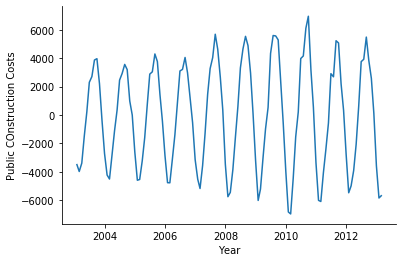

In [19]:
fig,ax = plt.subplots()
ax.plot(dfPP['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Public COnstruction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfPP['R1'])/len(dfPP))

##### Use autocorrelation analysis to detect whether any cyclical patterns exist and how many periods before they are repeated.

In [20]:
maxCorr = 0.0
period = np.NaN
for i in range(1,25):
    corr = dfPP['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8491719686828486
Correlation, lag  2     0.4816401870536206
Correlation, lag  3     -0.011840023339884362
Correlation, lag  4     -0.4987016188834362
Correlation, lag  5     -0.8362285995426119
Correlation, lag  6     -0.9584853417076534
Correlation, lag  7     -0.8410219068050433
Correlation, lag  8     -0.49733417646177636
Correlation, lag  9     -0.0025052053488663563
Correlation, lag  10     0.4811044005440984
Correlation, lag  11     0.8398692171347962
Correlation, lag  12     0.9807625496082434
Correlation, lag  13     0.837236275145739
Correlation, lag  14     0.48028386067089557
Correlation, lag  15     -0.01010245635473136
Correlation, lag  16     -0.4907689931289587
Correlation, lag  17     -0.8244225050556095
Correlation, lag  18     -0.9473385681101439
Correlation, lag  19     -0.8313211744978632
Correlation, lag  20     -0.49319826964223085
Correlation, lag  21     -0.009194028259920604
Correlation, lag  22     0.46816047357468393
Correlation, lag

##### Maximum correlation occurs at period of 12

##### Break the time series into 10 components corresonding with each of the three cycles in the data. 
##### Computes an average for each of the 24 points within the cycle over all intances of each point in the data. 
##### Plots the average versus the 10 cycles within the data

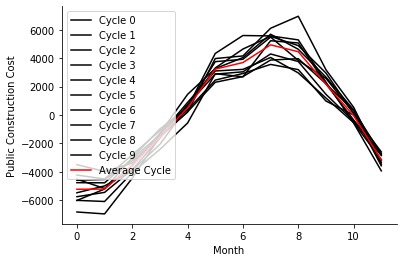

In [21]:
cycleLen = period
numCycles = int(len(dfPP)/cycleLen + 0.5)
cycles = [dfPP.iloc[range(i*period,min((i+1)*period,len(dfPP)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfPP.iloc[range(i,len(dfPP['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Public Construction Cost')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

##### Create column 'C' and insert Cyclicality value.
##### Plot the cyclicality component  '𝐶'  with  𝑅1  column to compare

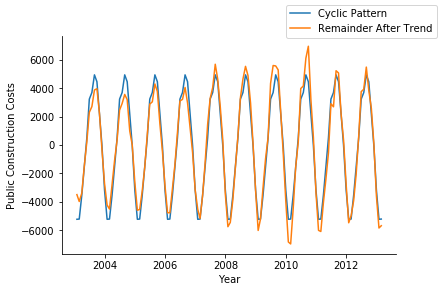

In [22]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfPP)/cycleLen + 0.5)
dfPP['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(dfPP)):
    dfPP.loc[dfPP.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(dfPP['C'],label='Cyclic Pattern')
ax.plot(dfPP['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

##### Compute the 𝜖(𝑚) in the model. THis is the "noise" in the original graph not accounted for in the Trend or Cyclical terms.
##### Compute error (R2).
##### Plots Trend plus Cyclical model with original data.
##### Computes absolute error.
##### Removes the sqErr.

Average Error:  0.02619125033334101
            Month Month-Year  Total Construction  Private Construction  \
2003-01-31     13     Jan-03               59877                 45473   
2003-02-28     14     Feb-03               58526                 44620   
2003-03-31     15     Mar-03               64506                 49996   
2003-04-30     16     Apr-03               69638                 53195   
2003-05-31     17     May-03               74473                 56286   
...           ...        ...                 ...                   ...   
2012-10-31    130     Oct-12               81520                 55888   
2012-11-30    131     Nov-12               77091                 53942   
2012-12-31    132     Dec-12               68136                 48740   
2013-01-31    133     Jan-13               59143                 42070   
2013-02-28    134     Feb-13               58395                 41224   

            Public Construction        MovAvg           R1   R1Error  \
200

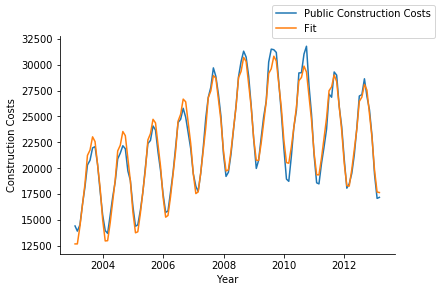

In [23]:
dfPP['R2'] = dfPP['R1'] - dfPP['C']
dfPP['R2Error'] = abs(dfPP['R2']/dfPP['Public Construction'])
dfPP['fit'] = dfPP['MovAvg'] + dfPP['C']
dfPP.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(dfPP['R2Error'])/len(dfPP))
print(dfPP)
fig,ax = plt.subplots()
ax.plot(dfPP['Public Construction'],label='Public Construction Costs')
ax.plot(dfPP['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

##### Plot R2 to observe any remaining patterns that need to be captured.
##### Generate autocorrelation of the residual.

Correlation, lag  1     0.6856153409801912
Correlation, lag  2     0.39837767725619655
Correlation, lag  3     0.1387086413245146
Correlation, lag  4     -0.21962019290951817
Correlation, lag  5     -0.4341344609781704
Correlation, lag  6     -0.5793817312447771
Correlation, lag  7     -0.6489843529481838
Correlation, lag  8     -0.48121571850236394
Correlation, lag  9     -0.1960396777239647
Correlation, lag  10     -0.0027068698904452377
Correlation, lag  11     0.31403350140916125
Correlation, lag  12     0.48729031781463905
Correlation, lag  13     0.4419032080230527
Correlation, lag  14     0.4698444324442449
Correlation, lag  15     0.2500136967723997
Correlation, lag  16     0.0280611372712878
Correlation, lag  17     -0.1142970742906963
Correlation, lag  18     -0.2741255454177252
Correlation, lag  19     -0.3515712775746184
Correlation, lag  20     -0.28014508336172983
Correlation, lag  21     -0.17789186956368688
Correlation, lag  22     -0.03136639881176351
Correlation, lag 

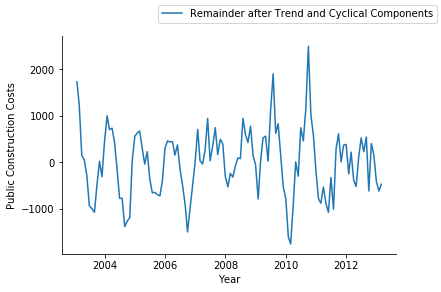

In [24]:
fig,ax = plt.subplots()
ax.plot(dfPP['R2'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Public Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfPP['R2'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

##### Plot the model versus the original data and 𝑅2 to judge the fit.

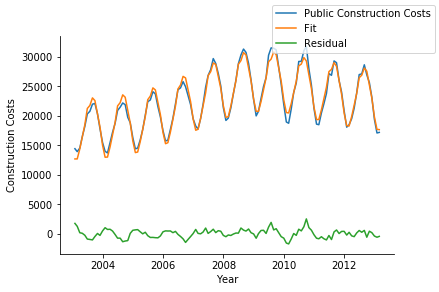

In [25]:
fig,ax = plt.subplots()
ax.plot(dfPP['Public Construction'],label='Public Construction Costs')
ax.plot(dfPP['fit'],label='Fit')
ax.plot(dfPP['R2'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Costs')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
